Model Building

In [1]:
import os
import pickle
import cv2
import numpy as np
import pandas as pd


In [2]:
#Loading data that saved from data preparation
data=np.load('E:/AI Projects/ReInforcement learning/RL_DRONE/controllers/AI_Drone_DataCol/api_0.2/DroneData.npy')
target=np.load('E:/AI Projects/ReInforcement learning/RL_DRONE/controllers/AI_Drone_DataCol/api_0.2/DroneTarget.npy')
data.shape[1:]

(50, 50, 1)

In [3]:
target.shape

(235, 3)

In [4]:
data[1:]

array([[[[0.58823529],
         [0.49019608],
         [0.45882353],
         ...,
         [0.79607843],
         [0.81176471],
         [0.8       ]],

        [[0.50588235],
         [0.41568627],
         [0.40392157],
         ...,
         [0.78431373],
         [0.81176471],
         [0.78431373]],

        [[0.45490196],
         [0.46666667],
         [0.5254902 ],
         ...,
         [0.81176471],
         [0.78039216],
         [0.80784314]],

        ...,

        [[0.76862745],
         [0.78039216],
         [0.77647059],
         ...,
         [0.78823529],
         [0.80784314],
         [0.8       ]],

        [[0.8       ],
         [0.77647059],
         [0.76862745],
         ...,
         [0.80392157],
         [0.81176471],
         [0.80784314]],

        [[0.77254902],
         [0.76470588],
         [0.80784314],
         ...,
         [0.81176471],
         [0.79215686],
         [0.81176471]]],


       [[[0.9254902 ],
         [0.90196078],
         [0.94

In [5]:
#Building the CNN Model
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D, Dropout

model=Sequential()


model.add(Conv2D(510,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 510)       5100      
                                                                 
 activation (Activation)     (None, 48, 48, 510)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 510)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       1175296   
                                                                 
 activation_1 (Activation)   (None, 22, 22, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                    

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.3)

In [7]:
import tensorflow as tf

# Configure GPU usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        # Restrict TensorFlow to only use the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        
        # Enable memory growth to allocate GPU memory dynamically
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
        print("GPU configuration set successfully!")
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Physical devices cannot be modified after being initialized


In [8]:
print(tf.__version__)

2.10.1


In [13]:
#fitting the model
history=model.fit(train_data,train_target, validation_data=(test_data,test_target), epochs=200) #50-100

Epoch 1/200
6/6 [==============================] - 1s 70ms/step - loss: 0.1210 - accuracy: 0.9634 - val_loss: 1.8656 - val_accuracy: 0.7746
Epoch 2/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0782 - accuracy: 0.9756 - val_loss: 2.3868 - val_accuracy: 0.7465
Epoch 3/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0744 - accuracy: 0.9695 - val_loss: 2.4219 - val_accuracy: 0.8451
Epoch 4/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0600 - accuracy: 0.9756 - val_loss: 2.5291 - val_accuracy: 0.8451
Epoch 5/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0451 - accuracy: 0.9756 - val_loss: 2.6636 - val_accuracy: 0.8169
Epoch 6/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0221 - accuracy: 0.9878 - val_loss: 2.5684 - val_accuracy: 0.8310
Epoch 7/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0285 - accuracy: 0.9878 - val_loss: 2.5987 - val_accuracy: 0.8451
Epoch 8/200
6/6 [===

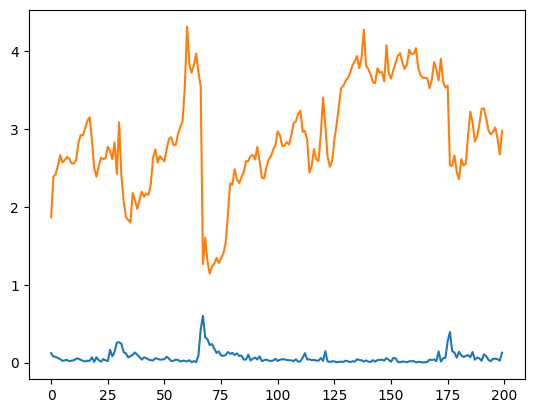

In [14]:
#Evaluating the performance
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

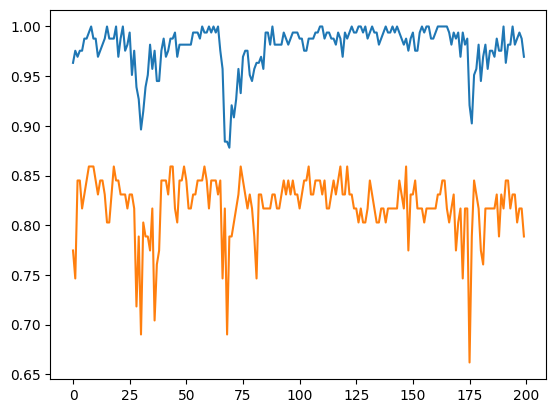

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [16]:
accc = model.evaluate(test_data,test_target)
print(accc)

3/3 [==============================] - 0s 16ms/step - loss: 2.9732 - accuracy: 0.7887
[2.9732108116149902, 0.7887324094772339]


In [17]:


model.summary()
save_path = "E:/AI Projects/ReInforcement learning/RL_DRONE/Model/"
model.save(save_path + "drone_cnn_model.h5",save_format="h5")
model.save_weights(save_path + "drone_cnn_model_weights.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 510)       5100      
                                                                 
 activation (Activation)     (None, 48, 48, 510)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 510)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       1175296   
                                                                 
 activation_1 (Activation)   (None, 22, 22, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                    